# [O/Fe] in Milky Way Mapper

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
from astropy.table import Table
from astropy.io import fits
from astropy import coordinates as coords
import astropy.units as u
from apogee_tools import import_apogee, apogee_mdf
import paths
from utils import fits_to_pandas, quad_add, get_color_list, get_bin_centers
import _globals

In [119]:
# Despite what the header says, the ASPCAP fits file has 2 hdus, one for BOSS and one for APOGEE spectra
fits_path = paths.data / 'MWM' / 'astraAllStarASPCAP-0.5.0.fits.gz'
with fits.open(fits_path) as hdul:
    print(hdul[0].header)
    hdul.info()
    print(hdul[2].header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                                                                                                          Metadata                                                                                                                                                PIPELINE= 'ASPCAP  '           / Pipeline name                                  V_ASTRA = '0.5.0   '           / Astra version                                  CREATED = '23-11-16 06:21:58'  / File creation time (UTC %y-%m-%d %H:%M:%S)                                                                                             HDU Descriptions                                                                                                

In [121]:
# For now I'm using the astroNN pipeline, but I need to ask Jennifer which to use
fits_path = paths.data / 'MWM' / 'astraAllStarAstroNN-0.5.0.fits.gz'
with fits.open(fits_path) as hdul:
    print(hdul[0].header)
    hdul.info()
    print(hdul[3].header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                                                                                                          Metadata                                                                                                                                                PIPELINE= 'AstroNN '           / Pipeline name                                  V_ASTRA = '0.5.0   '           / Astra version                                  CREATED = '23-11-01 00:01:19'  / File creation time (UTC %y-%m-%d %H:%M:%S)                                                                                             HDU Descriptions                                                                                                

In [122]:
mwm_data = fits_to_pandas(fits_path, hdu=3)
mwm_data

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,e_cr_h,mn_h,e_mn_h,fe_h,e_fe_h,co_h,e_co_h,ni_h,e_ni_h,result_flags
0,54968703,2M03455109+5955388,474071961785254400,474071961785254400,317571372,13335,NaN,gaia_dr3_source,31,63050394798264488,...,0.072933,-0.525819,0.055265,-0.470341,4.718678e-02,-0.347861,0.045103,-0.422831,0.042767,0
1,116010946,2M03455125+3159498,216648634427297920,216648634427297920,26393503,45904,NaN,gaia_dr3_source,31,63050396568859167,...,0.081050,-0.493498,0.057608,-0.434992,4.285292e-02,-0.418956,0.102396,-0.374825,0.045476,0
2,115035266,2M03455159+2325547,-1,64975609581746048,67830029,59216,NaN,gaia_dr3_source,31,63050396553025956,...,0.172910,-0.445959,0.097664,-0.363432,7.155077e-02,-0.303351,0.481040,-0.362645,0.069905,0
3,76177480,2M03455162+0038581,3269673325870755200,3269673325870755200,457170651,97104,NaN,gaia_dr3_source,31,63050395128907311,...,0.142416,-0.027559,0.095345,-0.001123,6.501321e-02,-0.071517,0.522387,0.042541,0.071076,0
4,55102811,2M03455172+6734512,493273940227843200,493273940227843200,280630552,7358,NaN,gaia_dr3_source,31,63050394801204484,...,0.072681,0.172443,0.059767,0.123997,4.686309e-02,0.271797,0.042481,0.222881,0.053595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089922,84069564,U_Sgr,4092905375639902464,4092905375639902464,186635515,130699,NaN,gaia_dr3_source,31,63050395393663606,...,0.872499,-0.060608,0.315224,-0.035408,2.049232e-01,-0.127739,1.082978,-0.063796,0.204003,1
1089923,63832855,U_Vul,1825621002188696448,1825621002188696448,375534411,64162,NaN,gaia_dr3_source,31,63050394883286680,...,0.523259,-0.160459,0.285397,-0.186235,2.039317e-01,-0.345264,1.210003,-0.253741,0.209618,1
1089924,67137259,V1154_Cyg,2078709577944648192,2078709577944648192,272943843,31412,NaN,gaia_dr3_source,31,63050395013204904,...,0.802697,-0.405256,0.294545,-0.398141,2.082728e-01,-0.857634,2.357735,-0.482845,0.217985,1
1089925,83701582,V350_Sgr,4080122796947250176,4080122796947250176,5517547,132752,NaN,gaia_dr3_source,31,63050395366528657,...,inf,61.165344,inf,59.782444,8.839545e+12,74.825012,inf,49.005451,inf,1


In [123]:
mwm_data.columns.to_list()

['sdss_id',
 'sdss4_apogee_id',
 'gaia_dr2_source_id',
 'gaia_dr3_source_id',
 'tic_v8_id',
 'healpix',
 'carton_0',
 'lead',
 'version_id',
 'catalogid',
 'catalogid21',
 'catalogid25',
 'catalogid31',
 'n_associated',
 'n_neighborhood',
 'sdss4_apogee_target1_flags',
 'sdss4_apogee_target2_flags',
 'sdss4_apogee2_target1_flags',
 'sdss4_apogee2_target2_flags',
 'sdss4_apogee2_target3_flags',
 'sdss4_apogee_member_flags',
 'sdss4_apogee_extra_target_flags',
 'ra',
 'dec',
 'plx',
 'e_plx',
 'pmra',
 'e_pmra',
 'pmde',
 'e_pmde',
 'gaia_v_rad',
 'gaia_e_v_rad',
 'g_mag',
 'bp_mag',
 'rp_mag',
 'j_mag',
 'e_j_mag',
 'h_mag',
 'e_h_mag',
 'k_mag',
 'e_k_mag',
 'ph_qual',
 'bl_flg',
 'cc_flg',
 'w1_flux',
 'w1_dflux',
 'w2_flux',
 'w2_dflux',
 'w1_frac',
 'w2_frac',
 'w1uflags',
 'w2uflags',
 'w1aflags',
 'w2aflags',
 'mag4_5',
 'd4_5m',
 'rms_f4_5',
 'sqf_4_5',
 'mf4_5',
 'csf',
 'zgr_teff',
 'zgr_e_teff',
 'zgr_logg',
 'zgr_e_logg',
 'zgr_fe_h',
 'zgr_e_fe_h',
 'zgr_e',
 'zgr_e_e',
 'zg

Sample cuts & calculate [O/Fe] values and errors. I need to get the proper quality flags for astroNN / ASPCAP.

In [26]:
sample = mwm_data[(mwm_data['snr'] > 80) & 
                  (mwm_data['logg'] > 1) & 
                  (mwm_data['logg'] < 3.8) & 
                  (mwm_data['teff'] > 3500) & 
                  (mwm_data['teff'] < 5500)].copy()
sample.dropna(subset=['fe_h', 'o_h'])
sample.reset_index(inplace=True, drop=True)
sample['o_fe'] = sample['o_h'] - sample['fe_h']
sample['e_o_fe'] = quad_add(sample['e_o_h'], sample['e_fe_h'])
sample

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,e_mn_h,fe_h,e_fe_h,co_h,e_co_h,ni_h,e_ni_h,result_flags,o_fe,e_o_fe
0,116010946,2M03455125+3159498,216648634427297920,216648634427297920,26393503,45904,NaN,gaia_dr3_source,31,63050396568859167,...,0.057608,-0.434992,0.042853,-0.418956,0.102396,-0.374825,0.045476,0,0.148526,0.061310
1,55104064,2M03455177+6743505,493463709063153152,493463709063153152,280630750,7117,NaN,gaia_dr3_source,31,63050394801235029,...,0.071883,-0.317595,0.052104,-0.328576,0.158099,-0.182871,0.068815,0,0.125165,0.070469
2,115034424,2M03455262+2234302,64792678333336192,64792678333336192,67830377,60240,NaN,gaia_dr3_source,31,63050396553017170,...,0.054119,0.069296,0.036336,0.216334,0.043786,0.109787,0.038638,0,0.119722,0.049555
3,114939296,2M03455286+1055349,36271793386684160,36271793386684160,426590182,79696,NaN,gaia_dr3_source,31,63050396551955387,...,0.051288,0.196309,0.036189,0.281400,0.039863,0.265545,0.041988,0,0.032901,0.046312
4,54637265,2M03455304+5419017,444539083759644544,444539083759644544,317683382,18300,NaN,gaia_dr3_source,31,63050394790185383,...,0.051606,-0.481756,0.037883,-0.361263,0.044477,-0.440466,0.038665,0,0.078797,0.057814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465935,87028322,RU_Sct,4258436301367796480,4258436301367796480,182444221,105103,NaN,gaia_dr3_source,31,63050395618038218,...,0.262767,-0.308126,0.219052,-0.366710,0.646103,-0.312347,0.211866,1,0.098652,0.294799
465936,76434282,SV_Mon,3324153371114695680,3324153371114695680,263284321,86919,NaN,gaia_dr3_source,31,63050395132489687,...,0.277033,-0.317772,0.222511,-0.702435,1.924098,-0.364618,0.211031,1,-0.007950,0.326853
465937,66184113,SV_Vul,2027951173435143680,2027951173435143680,11145790,53415,NaN,gaia_dr3_source,31,63050394968492542,...,0.264292,-0.164677,0.228596,-0.498733,1.634967,-0.174473,0.222670,1,-0.063553,0.371541
465938,76440067,T_Mon,3324535073449061504,3324535073449061504,206703838,86409,NaN,gaia_dr3_source,31,63050395132602398,...,0.220384,-0.118275,0.179561,-0.159019,0.487109,-0.144502,0.179760,1,-0.127001,0.307593


Calculate galactocentric coordinates

In [33]:
ra = np.array(sample['ra']) * u.deg
dec = np.array(sample['dec']) * u.deg
d = np.array(sample['r_med_photogeo']) * u.pc
sky = coords.SkyCoord(ra=ra, dec=dec, distance=d, frame='icrs')
galactocentric = sky.transform_to(frame=coords.Galactocentric())
galactocentric.representation_type = 'cylindrical'
galactocentric
sample['galr'] = galactocentric.rho.to(u.kpc).value
sample['galphi'] = galactocentric.phi.to(u.deg).value
sample['galz'] = galactocentric.z.to(u.kpc).value
sample

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,co_h,e_co_h,ni_h,e_ni_h,result_flags,o_fe,e_o_fe,galr,galphi,galz
0,116010946,2M03455125+3159498,216648634427297920,216648634427297920,26393503,45904,NaN,gaia_dr3_source,31,63050396568859167,...,-0.418956,0.102396,-0.374825,0.045476,0,0.148526,0.061310,12.087988,173.578696,-1.286873
1,55104064,2M03455177+6743505,493463709063153152,493463709063153152,280630750,7117,NaN,gaia_dr3_source,31,63050394801235029,...,-0.328576,0.158099,-0.182871,0.068815,0,0.125165,0.070469,8.795326,176.203302,0.180724
2,115034424,2M03455262+2234302,64792678333336192,64792678333336192,67830377,60240,NaN,gaia_dr3_source,31,63050396553017170,...,0.216334,0.043786,0.109787,0.038638,0,0.119722,0.049555,9.203252,178.513810,-0.486877
3,114939296,2M03455286+1055349,36271793386684160,36271793386684160,426590182,79696,NaN,gaia_dr3_source,31,63050396551955387,...,0.281400,0.039863,0.265545,0.041988,0,0.032901,0.046312,8.659568,179.806896,-0.328339
4,54637265,2M03455304+5419017,444539083759644544,444539083759644544,317683382,18300,NaN,gaia_dr3_source,31,63050394790185383,...,-0.361263,0.044477,-0.440466,0.038665,0,0.078797,0.057814,11.739574,169.007620,0.007155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465935,87028322,RU_Sct,4258436301367796480,4258436301367796480,182444221,105103,NaN,gaia_dr3_source,31,63050395618038218,...,-0.366710,0.646103,-0.312347,0.211866,1,0.098652,0.294799,6.498625,172.004065,0.024316
465936,76434282,SV_Mon,3324153371114695680,3324153371114695680,263284321,86919,NaN,gaia_dr3_source,31,63050395132489687,...,-0.702435,1.924098,-0.364618,0.211031,1,-0.007950,0.326853,10.120981,-175.109784,-0.111714
465937,66184113,SV_Vul,2027951173435143680,2027951173435143680,11145790,53415,NaN,gaia_dr3_source,31,63050394968492542,...,-0.498733,1.634967,-0.174473,0.222670,1,-0.063553,0.371541,7.371042,162.094078,0.032143
465938,76440067,T_Mon,3324535073449061504,3324535073449061504,206703838,86409,NaN,gaia_dr3_source,31,63050395132602398,...,-0.159019,0.487109,-0.144502,0.179760,1,-0.127001,0.307593,9.402671,-176.627215,-0.037545


2D histogram of location of stars in the sample

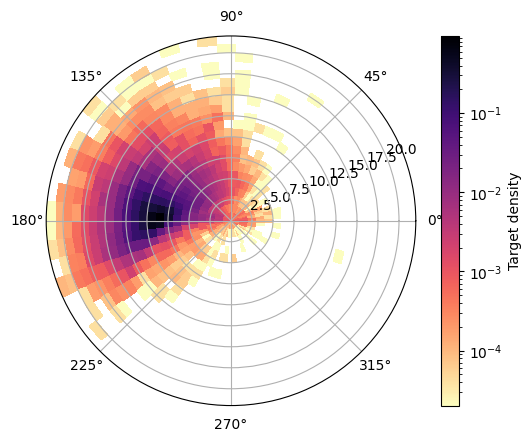

In [65]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
abins = np.linspace(-np.pi, np.pi, 60)
rbins = np.arange(0, 23, 1)
hist, _, _ = np.histogram2d(sample['galphi']*np.pi/180, sample['galr'], bins=(abins, rbins), density=True)
A, R = np.meshgrid(abins, rbins)
pc = ax.pcolormesh(A, R, hist.T, cmap='magma_r', norm=LogNorm())
fig.colorbar(pc, label='Target density')
plt.show()

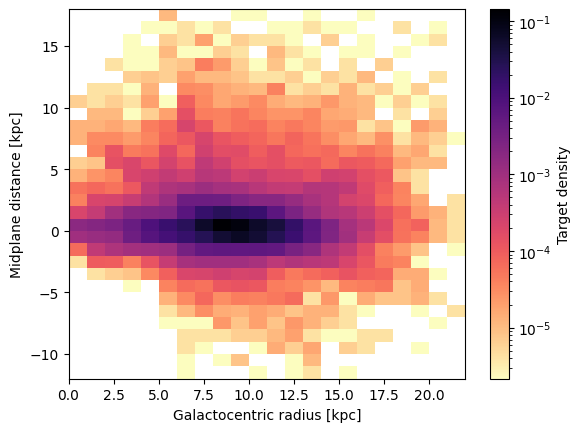

In [68]:
fig, ax = plt.subplots()
rbins = np.arange(0, 23, 1)
zbins = np.arange(-12, 19, 1)
hist, _, _ = np.histogram2d(sample['galr'], sample['galz'], bins=(rbins, zbins), density=True)
R, Z = np.meshgrid(rbins, zbins)
pc = ax.pcolormesh(R, Z, hist.T, cmap='magma_r', norm=LogNorm())
ax.set_xlabel('Galactocentric radius [kpc]')
ax.set_ylabel('Midplane distance [kpc]')
fig.colorbar(pc, label='Target density')
plt.show()

Median [O/Fe] in bins of Rgal and z

In [72]:
rbins = np.arange(0, 31, 1)
zbins = np.arange(-21, 21, 1)
binned = sample.groupby([pd.cut(sample.galr, rbins), pd.cut(sample.galz, zbins)], observed=False)
binned['o_fe'].median()

galr      galz      
(0, 1]    (-21, -20]   NaN
          (-20, -19]   NaN
          (-19, -18]   NaN
          (-18, -17]   NaN
          (-17, -16]   NaN
                        ..
(29, 30]  (15, 16]     NaN
          (16, 17]     NaN
          (17, 18]     NaN
          (18, 19]     NaN
          (19, 20]     NaN
Name: o_fe, Length: 1230, dtype: float32

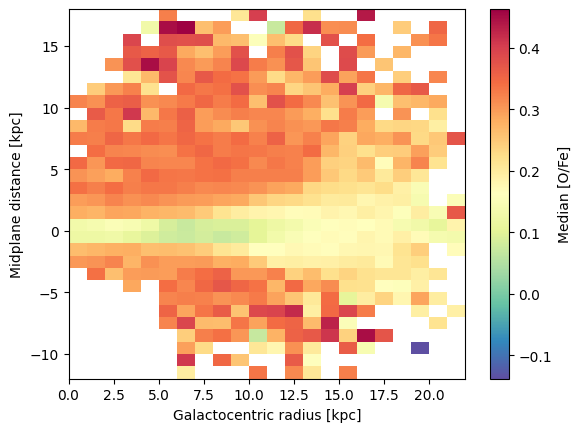

In [81]:
fig, ax = plt.subplots()
R, Z = np.meshgrid(rbins, zbins)
pc = ax.pcolormesh(R, Z, np.reshape(binned['o_fe'].median(), (rbins.shape[0]-1, zbins.shape[0]-1)).T, cmap='Spectral_r')
ax.set_xlabel('Galactocentric radius [kpc]')
ax.set_ylabel('Midplane distance [kpc]')
ax.set_xlim((0, 22))
ax.set_ylim((-12, 18))
fig.colorbar(pc, label='Median [O/Fe]')
fig.show()

[O/Fe] distributions from MWM vs APOGEE

In [92]:
apogee_data = import_apogee()

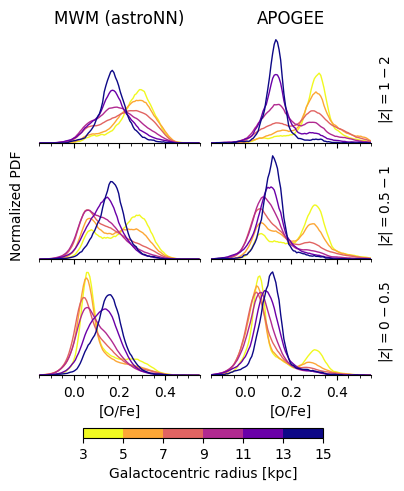

In [112]:
import distribution_functions as dfs
plt.style.use('default')
fig, axs = dfs.setup_axes(ncols=2, xlabel='[O/Fe]', figure_width=4)
colors = get_color_list(plt.get_cmap('plasma_r'), _globals.GALR_BINS)
mdf_kwargs = {'bins': 100, 'range': (-0.15, 0.55), 'smoothing': 0.05}
# Plot MWM distributions
for i, ax in enumerate(axs[:,0].flatten()):
    absz_lim = _globals.ABSZ_BINS[-(i+2):len(_globals.ABSZ_BINS)-i]
    for j in range(len(_globals.GALR_BINS)-1):
        galr_lim = _globals.GALR_BINS[j:j+2]
        subset = sample[(sample['galr'] >= galr_lim[0]) &
                      (sample['galr'] < galr_lim[1]) &
                      (sample['galz'].abs() >= absz_lim[0]) &
                      (sample['galz'].abs() < absz_lim[1])].copy()
        mdf, bin_edges = apogee_mdf(subset, col='o_fe', **mdf_kwargs)
        ax.plot(get_bin_centers(bin_edges), mdf, 
                color=colors[j], linewidth=1)
axs[0,0].set_title('MWM (astroNN)', va='top', pad=18)
# Plot APOGEE distributions
dfs.plot_apogee_mdfs(apogee_data, axs[:,1], col='O_FE', colors=colors, 
                     **mdf_kwargs)
axs[0,0].set_xlim(mdf_kwargs['range'])
axs[0,0].xaxis.set_major_locator(MultipleLocator(0.2))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(0.05))
for ax in axs[:,0]:
    ax.set_ylim((0, None))
plt.show()